In [1]:
import akshare as ak
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from time import sleep
import pandas as pd

In [2]:
stock_ind_list = ak.stock_board_industry_name_ths()['name'].to_list()
stock_ind_list

['半导体及元件',
 '白色家电',
 '保险及其他',
 '包装印刷',
 '传媒',
 '厨卫电器',
 '电力',
 '电力设备',
 '电子化学品',
 '房地产服务',
 '房地产开发',
 '非金属材料',
 '非汽车交运',
 '服装家纺',
 '纺织制造',
 '国防军工',
 '贵金属',
 '港口航运',
 '公路铁路运输',
 '钢铁',
 '光学光电子',
 '工业金属',
 '环保',
 '化工合成材料',
 '互联网电商',
 '黑色家电',
 '化学原料',
 '化学制品',
 '化学制药',
 '机场航运',
 '酒店及餐饮',
 '景点及旅游',
 '计算机设备',
 '计算机应用',
 '金属新材料',
 '教育',
 '家用轻工',
 '建筑材料',
 '建筑装饰',
 '零售',
 '美容护理',
 '煤炭开采加工',
 '贸易',
 '农产品加工',
 '农业服务',
 '汽车服务',
 '汽车零部件',
 '汽车整车',
 '其他电子',
 '其他社会服务',
 '燃气',
 '食品加工制造',
 '生物制品',
 '石油加工贸易',
 '通信服务',
 '通信设备',
 '通用设备',
 '物流',
 '消费电子',
 '小家电',
 '小金属',
 '医疗服务',
 '医疗器械',
 '饮料制造',
 '油气开采及服务',
 '仪器仪表',
 '银行',
 '医药商业',
 '养殖业',
 '自动化设备',
 '综合',
 '证券',
 '中药',
 '专用设备',
 '造纸',
 '种植业与林业']

In [3]:
ind_today = dict()
ind_dataframe_list = []
for s in stock_ind_list:
    try:
        industry = ak.stock_board_industry_index_ths(symbol=s)
    except:
        sleep(30)
        industry = ak.stock_board_industry_index_ths(symbol=s)
    industry.rename(columns={u'日期':'date', u'开盘价': 'open', u'最高价':'high',u'最低价':'low', u'收盘价':'close', u'成交量':'volume', u'成交额':'amount'}, inplace=True)
    industry['close'] = pd.to_numeric(industry['close'], errors='coerce')
    industry['open'] = pd.to_numeric(industry['open'], errors='coerce')
    industry['high'] = pd.to_numeric(industry['high'], errors='coerce')
    industry['low'] = pd.to_numeric(industry['low'], errors='coerce')
    industry['volume'] = pd.to_numeric(industry['volume'], errors='coerce')
    industry['amount'] = pd.to_numeric(industry['amount'], errors='coerce')
    industry['EMA_9'] = industry['close'].ewm(9).mean().shift()
    industry['SMA_5'] = industry['close'].rolling(5).mean().shift()
    industry['SMA_10'] = industry['close'].rolling(10).mean().shift()
    industry['SMA_12'] = industry['close'].rolling(12).mean().shift()
    industry['SMA_15'] = industry['close'].rolling(15).mean().shift()
    industry['SMA_20'] = industry['close'].rolling(20).mean().shift()
    industry['SMA_30'] = industry['close'].rolling(30).mean().shift()
    industry['volume_t1'] = industry['volume'].shift(1)
    industry['volume_t2'] = industry['volume'].shift(2)
    industry['volume_t3'] = industry['volume'].shift(3)
    industry['volume_t4'] = industry['volume'].shift(4)
    industry['volume_t5'] = industry['volume'].shift(5)
    industry['volume_t6'] = industry['volume'].shift(6)
    industry['volume_t7'] = industry['volume'].shift(7)
    industry['volume_t8'] = industry['volume'].shift(8)
    industry['volume_t9'] = industry['volume'].shift(9)
    industry['volume_t10'] = industry['volume'].shift(10)
    industry['close_t1'] = industry['close'].shift(1)
    industry['close_t2'] = industry['close'].shift(2)
    industry['close_t3'] = industry['close'].shift(3)
    industry['close_t4'] = industry['close'].shift(4)
    industry['close_t5'] = industry['close'].shift(5)
    industry['close_t6'] = industry['close'].shift(6)
    industry['close_t7'] = industry['close'].shift(7)
    industry['close_t8'] = industry['close'].shift(8)
    industry['close_t9'] = industry['close'].shift(9)
    industry['close_t10'] = industry['close'].shift(10)
    industry['high_t1'] = industry['high'].shift(1)
    industry['high_t2'] = industry['high'].shift(2)
    industry['high_t3'] = industry['high'].shift(3)
    industry['high_t4'] = industry['high'].shift(4)
    industry['high_t5'] = industry['high'].shift(5)
    industry['high_t6'] = industry['high'].shift(6)
    industry['high_t7'] = industry['high'].shift(7)
    industry['high_t8'] = industry['high'].shift(8)
    industry['high_t9'] = industry['high'].shift(9)
    industry['high_t10'] = industry['high'].shift(10)
    industry['low_t1'] = industry['low'].shift(1)
    industry['low_t2'] = industry['low'].shift(2)
    industry['low_t3'] = industry['low'].shift(3)
    industry['low_t4'] = industry['low'].shift(4)
    industry['low_t5'] = industry['low'].shift(5)
    industry['low_t6'] = industry['low'].shift(6)
    industry['low_t7'] = industry['low'].shift(7)
    industry['low_t8'] = industry['low'].shift(8)
    industry['low_t9'] = industry['low'].shift(9)
    industry['low_t10'] = industry['low'].shift(10)
    industry['amount_t1'] = industry['amount'].shift(1)
    industry['amount_t2'] = industry['amount'].shift(2)
    industry['amount_t3'] = industry['amount'].shift(3)
    industry['amount_t4'] = industry['amount'].shift(4)
    industry['amount_t5'] = industry['amount'].shift(5)
    industry['amount_t6'] = industry['amount'].shift(6)
    industry['amount_t7'] = industry['amount'].shift(7)
    industry['amount_t8'] = industry['amount'].shift(8)
    industry['amount_t9'] = industry['amount'].shift(9)
    industry['amount_t10'] = industry['amount'].shift(10)
    industry['SMA_10_rate_1'] = (industry['SMA_10'] - industry['SMA_10'].shift(1))
    industry['SMA_10_rate_2'] = (industry['SMA_10'].shift(1) - industry['SMA_10'].shift(2))
    industry['SMA_10_rate_3'] = (industry['SMA_10'].shift(2) - industry['SMA_10'].shift(3))
    industry['SMA_10_rate_4'] = (industry['SMA_10'].shift(3) - industry['SMA_10'].shift(4))
    industry['SMA_10_rate_5'] = (industry['SMA_10'].shift(4) - industry['SMA_10'].shift(5))
    industry['SMA_5_rate_1'] = (industry['SMA_5'] - industry['SMA_5'].shift(1))
    industry['SMA_5_rate_2'] = (industry['SMA_5'].shift(1) - industry['SMA_5'].shift(2))
    industry['SMA_5_rate_3'] = (industry['SMA_5'].shift(2) - industry['SMA_5'].shift(3))
    industry['SMA_5_rate_4'] = (industry['SMA_5'].shift(3) - industry['SMA_5'].shift(4))
    industry['SMA_5_rate_5'] = (industry['SMA_5'].shift(4) - industry['SMA_5'].shift(5))
    industry['y'] = (industry['close'] - industry['close_t1'])/industry['close']
    industry['y'] = industry['y'].apply(lambda x: '1' if x>=0 else '0')
    industry['y'] = industry['y'].astype(int)
    industry['y'] = industry['y'].shift(-1)
    industry_now = industry.tail(1)
    industry.dropna(axis=0, inplace=True)
    drop_cols = ['date']
    industry = industry.drop(drop_cols, 1)
    ind_today.update({s:industry_now})
    ind_dataframe_list.append(industry)


In [4]:
from sklearn.model_selection import train_test_split
ind_dataframe = pd.concat(ind_dataframe_list,axis=0, ignore_index=True)
X = ind_dataframe.drop(['y'], axis=1)
Y = ind_dataframe['y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
parameters = {
'n_estimators': [5,6,7,8,9],
'learning_rate': [0.02,0.01,0.025,0.03],
'max_depth': [5,6,7,8,9],
'gamma': [0.02,0.01,0.025,0.03],
}
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'logloss').fit(X_train, y_train)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
model = xgb.XGBClassifier(**clf.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy: ',  accuracy)
print('f1: ', f1)

/Users/zhangjinghang/.conda/envs/ML/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.5650275891053538
f1:  0.6738701742259449


In [5]:
model.predict_proba(X_test)


array([[0.49971563, 0.5002844 ],
       [0.48710912, 0.5128909 ],
       [0.49595273, 0.5040473 ],
       ...,
       [0.49308527, 0.50691473],
       [0.50867987, 0.49132016],
       [0.49813795, 0.50186205]], dtype=float32)

In [22]:
result_list = []
for k in ind_today.keys():
    pred_data = ind_today[k].drop(['date', 'y'], 1).loc[:].copy()
    pred_t = model.predict_proba(pred_data)
    # print(pred_t)
    score = pred_t[0][1]
    result_list.append({'name':k, 'score':score})
result = pd.DataFrame(result_list)
result.sort_values('score', axis = 0, ascending=False, inplace=True)
result.to_excel('./ind_pred_result_new.xlsx')


In [23]:
from xgboost import plot_importance, plot_tree


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

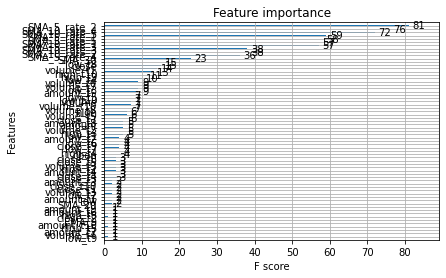

In [26]:
plot_importance(model)


In [25]:
clf.best_params_


{'gamma': 0.02, 'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 7}

In [27]:
plot_tree(model)


<AxesSubplot:>